# Introduction

The goal of this project is to analyze biodiversity data from the National Parks Service, with special emphasis on the various species observed in the different national Park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis

Here are a few questions that this project intends to answer
- What is the distribution of conservation status for species?
- Are certain species more likely to be endangered?
- Which animal is most common and what is their distribution amongst the parks?
- Are the difference between species and their conservation status significant?

**Data Sources:**
Both `Observations.csv` and `Species_info.csv` was provided by Codecademy

*Note*: The data within this project is inspired by real data and doesn't 100 accurately describe the real data in the real world


## Scoping
### Project Goals

Within this project, the main goal is to understand the characteristics of the species within the national parks and their conservations status, and the relationship between these species and the national parks.

### Data

Within this project, there are two data sets we be working with. The first file, `Observations.csv`, has information about each species in the nation parks. The second file, `Species_info.csv`, has information about each species in general, like their conservation status.

### Analysis

Through the use of descriptive statistics techniques, data visualization techniques, and statistical inference, the following will be found:

- Distributions
- Counts
- Relationship between species
- Conservation status of species
- Observations of species in parks

## Import Python Modules

In [1]:

import pandas as pd
import numpy as np
from matplotlib import  pyplot as plt
import seaborn as sns

## Loading the Data

In [2]:
observations = pd.read_csv('observations.csv')
print(f"Shape: {observations.shape}")
print(observations.describe())
observations.head()

Shape: (23296, 3)
       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Columns in observations
- **scientific_name** - the scientific name of animal
- **park_name** - the name of the national park the record was made in
- **observations** - the number of observations in the past 7 days

In [3]:
species = pd.read_csv('species_info.csv')
print(f"Shape: {species.shape}")
print(species.describe())
species.head()

Shape: (5824, 4)
              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### Columns in species
- **category** - the category of taxonomy for each specie
- **scientific_name** - the scientific name of each specie
- **common_name** - the common name of specie
- **conservation_status** - the specie conservation status

## Explore the Data

#### **species**

In [4]:
print(f"number of species:{species.scientific_name.nunique()}")

number of species:5541


In [5]:
print(f"nnumber of categories:{species.category.nunique()}")
print(f"categories:{species.category.unique()}")

nnumber of categories:7
categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [6]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [7]:
print(f"number of conservation statuses:{species.conservation_status.nunique()}")
print(f"unique conservation statuses:{species.conservation_status.unique()}")

number of conservation statuses:4
unique conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [8]:
print(f"nan values:{species.conservation_status.isna().sum()}")

print(species.groupby("conservation_status").size())

nan values:5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


#### observation

In [9]:
print(f"number of parks:{observations.park_name.nunique()}")
print(f"unique parks:{observations.park_name.unique()}")

number of parks:4
unique parks:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [10]:
print(f"number of observations: {observations.observations.sum()}")

number of observations: 3314739


## Analysis

Since most of the conservation_status column is empty because of species not having being any level of endangerment, Structurally Missing Data, we are going to create a new category as species having no level of endangerment may be important in our analysis Another thing that may be important is if species is protected or not protected as this information can be used in the future to see where the resources going.

In [11]:
species.fillna('Normal', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
Normal                5633
Species of Concern     161
Threatened              10
dtype: int64

In [12]:
species['isProtected'] = species.conservation_status != 'Normal'

In [13]:

#? What is the distribution of conservation status for species?
conservationCategory = species[species.conservation_status != 'Normal']\
    .groupby(['category','conservation_status'])['scientific_name']\
    .count().unstack().reindex(columns=['In Recovery','Species of Concern','Threatened','Endangered'])
conservationCategory

conservation_status,In Recovery,Species of Concern,Threatened,Endangered
category,,,,
Amphibian,NaN,4.0,2.0,1.0
Bird,3.0,72.0,NaN,4.0
Fish,NaN,4.0,4.0,3.0
Mammal,1.0,28.0,2.0,7.0
Nonvascular Plant,NaN,5.0,NaN,NaN
Reptile,NaN,5.0,NaN,NaN
Vascular Plant,NaN,43.0,2.0,1.0


Text(0.5, 1.0, 'Conservation Status of different Species')

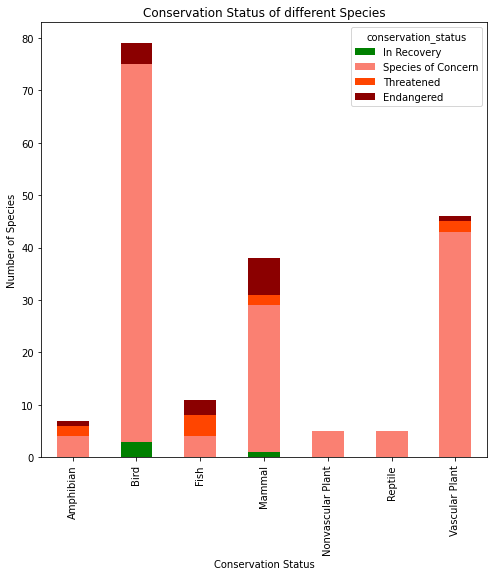

In [14]:
ax = conservationCategory.plot(kind = 'bar', figsize = (8,8),\
stacked = True, color=['green', 'salmon', 'orangered', 'darkred'])
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
ax.set_title('Conservation Status of different Species')

In [15]:
category_counts = species.groupby(['category','isProtected'])\
    .scientific_name.nunique().reset_index()\
    .pivot(columns='isProtected',index='category',values='scientific_name')\
    .reset_index()

category_counts.columns = ['category', 'not_protected', 'protected']

category_counts['percent_protected'] = \
    round(category_counts.protected / \
    (category_counts.protected + category_counts.not_protected) * 100,3)

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.861
1,Bird,413,75,15.369
2,Fish,115,11,8.730
3,Mammal,146,30,17.045
4,Nonvascular Plant,328,5,1.502
5,Reptile,73,5,6.410
6,Vascular Plant,4216,46,1.079


Why does the bird and mammal categories having a higher percentage of protected? 

In [16]:
from scipy.stats import chi2_contingency
level_of_significance = 0.05

#? Is there a relationship between birds and mammals?
contingency1 = [[30,146],[75,413]]
p_value1 = chi2_contingency(contingency1)[1]

if(p_value1 > level_of_significance):
    print("No relationship")
else:
    print("There is a relationship")

p_value1

No relationship


0.6875948096661336

Why does the Nonvascular Plant and Vascular Plant categories having a higher percentage of protected? Is it just because they are plants?

In [17]:
contingency2 = [[30, 146],
               [5, 73]]
p_value2 = chi2_contingency(contingency2)[1]

if p_value2 > level_of_significance:
    print("No relationship")
else:
    print("There is a relationship")

p_value2

There is a relationship


0.03835559022969898

In [36]:
categories_values = []
for i in range(category_counts.shape[0]):
    row = category_counts.iloc[i]
    category = row[0]
    not_p = row[1]
    yes_p = row[2]
    info = [category,yes_p,not_p]
    categories_values.append(info)

Are there more relationships between categories of species?

In [40]:
for i in range(len(categories_values)):
    for j in range(len(categories_values)):
        if i != j:
            a = categories_values[i][1:]
            b = categories_values[j][1:]
            c = [a,b]
            p = chi2_contingency(c)[1]
            if p < level_of_significance:
                print(f"{categories_values[i][0]} ~ {categories_values[j][0]}: {p}")

Amphibian ~ Nonvascular Plant: 0.001778554820715609
Amphibian ~ Vascular Plant: 1.0441355146657018e-08
Bird ~ Nonvascular Plant: 1.0546306904975004e-10
Bird ~ Vascular Plant: 4.612268031690143e-79
Fish ~ Nonvascular Plant: 0.0004960633228752838
Fish ~ Vascular Plant: 1.486846949188912e-12
Mammal ~ Nonvascular Plant: 1.481868915759314e-10
Mammal ~ Reptile: 0.03835559022969898
Mammal ~ Vascular Plant: 1.4405067309854046e-55
Nonvascular Plant ~ Amphibian: 0.001778554820715609
Nonvascular Plant ~ Bird: 1.0546306904974968e-10
Nonvascular Plant ~ Fish: 0.0004960633228752838
Nonvascular Plant ~ Mammal: 1.481868915759314e-10
Nonvascular Plant ~ Reptile: 0.03362698310726171
Reptile ~ Mammal: 0.03835559022969898
Reptile ~ Nonvascular Plant: 0.0336269831072617
Reptile ~ Vascular Plant: 0.00014505215494675828
Vascular Plant ~ Amphibian: 1.044135514665698e-08
Vascular Plant ~ Bird: 4.612268031690143e-79
Vascular Plant ~ Fish: 1.4868469491889182e-12
Vascular Plant ~ Mammal: 1.4405067309854046e-55
Va

Which animal is most common and what is their distribution amongst the parks?

In [18]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [19]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

In [20]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
38,Bat,23
85,Shrew,18
138,Myotis,17
168,Mouse,16
186,Chipmunk,13
64,American,12
46,Squirrel,12
14,Vole,11
185,Eastern,11
124,Western,10


In [22]:
species['isBat'] = species.common_names.str.contains(r"\bBat\b", regex = True)
species[species.isBat]
bat_observations = observations.merge(species[species.isBat])

In [23]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [24]:
obs_by_park = bat_observations.groupby(['park_name', 'isProtected']).observations.sum().reset_index()
obs_by_park

,park_name,isProtected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


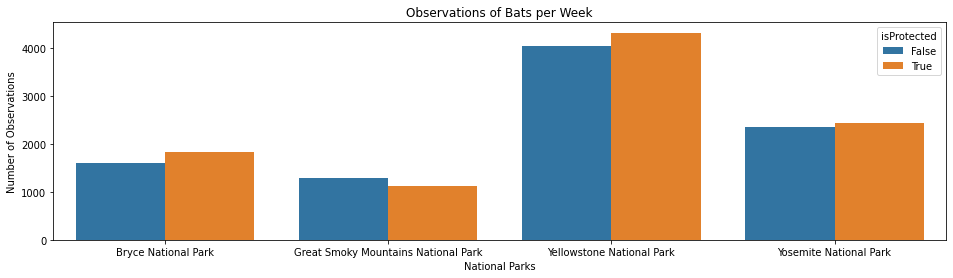

In [26]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.isProtected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

# Conclusions

Within this project, several data visualizations and inferences about the various in four of the National Parks presented in this data set

Some of the questions that were able to be answered now:

- What is the distribution of conservation status for species?

    > The major of species without data set where not part of conservation: 191 were and 5,633 weren't.

- Are certain species more likely to be endangered?

    > Birds and Mammals had the highest percentage of being in protection.

- Which animal is most common and what is their distribution amongst the parks?

    > Through analysis, bats were founded to be that most common animal which the majority of bats in our data set residing in Yellowstone National Park.
    
- Are the difference between species and their conservation status significant?
    > There are some cases such as for mammals and reptiles and Reptile Nonvascular Plant